# Analisi infetti e deceduti

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1
from aidam.miscellanea_utils import find_matlabstyle
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
import pickle as pkl
import numpy as np
import pandas as pd

## Lettura dati

In [34]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

giorni_label=np.array([g[0:10] for g in giorni])

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 431
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2021-04-29T17:00:00


### Inserimento di eventi notevoli riferiti a date

In [35]:
lockdown={'data':'2020-03-10',
          'id_giorno':15,
          'desc':'Lockdown'}

scuole_chiuse={'data':'2020-03-04',
               'id_giorno':9,
               'desc':'Scuole chiuse'}

fase_2={'data':'2020-05-04',
               'id_giorno':71,
               'desc':'Fase2'}


eventi=[scuole_chiuse,lockdown, fase_2]

Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni e parametri delle figure

In [36]:
# per i subplot determina la griglia
grid_shape=(7,3)
grid_seq=get_subplot_cells_sequence(grid_shape)

# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)




## Grafici Nazionali

In [37]:
indicatori_selected=['totale_casi',
                     'nuovi_positivi',
                     'guariti_giornalieri',
                    'variazione_totale_positivi',
                    'totale_positivi',
                    'deceduti_giornalieri']

days_back=90

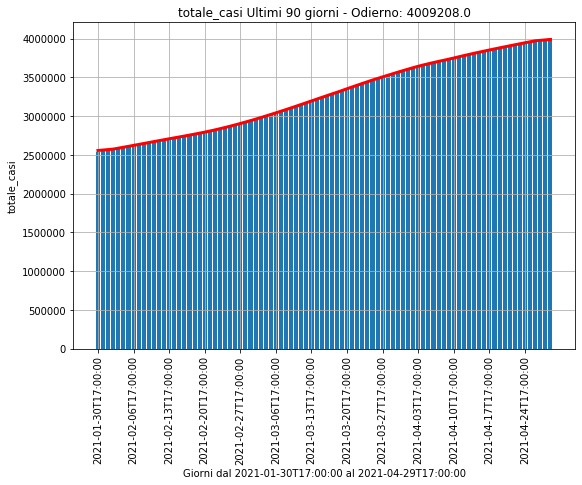

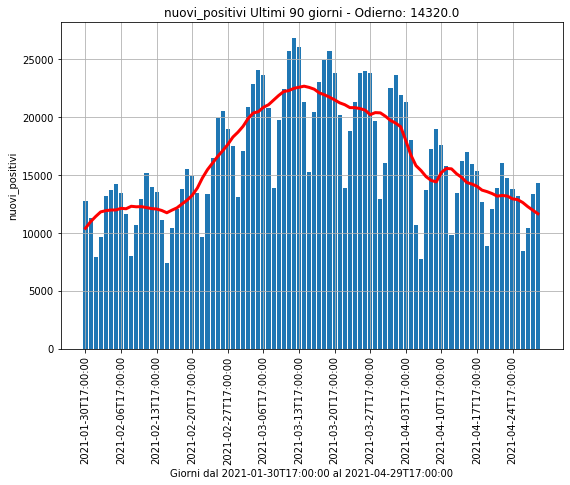

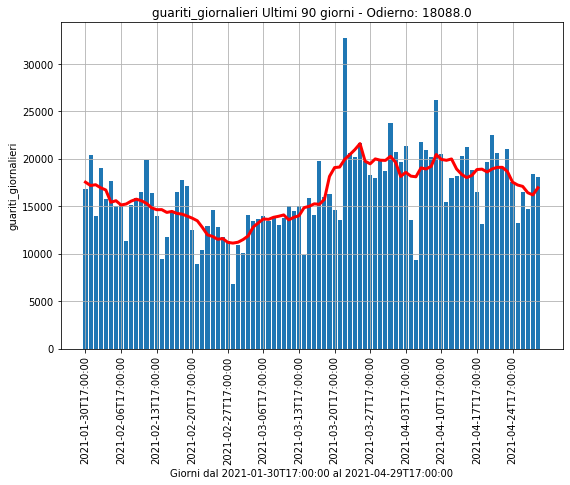

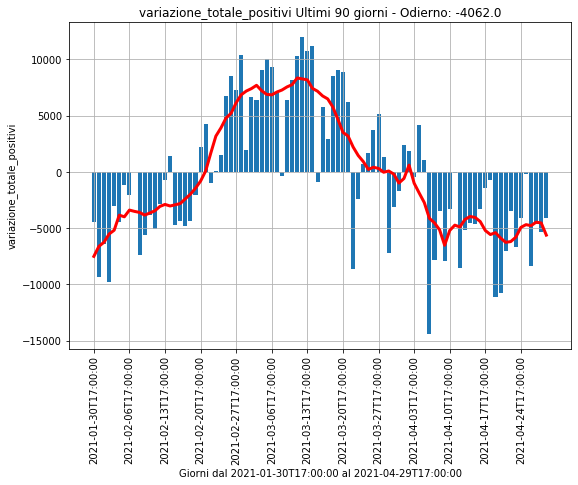

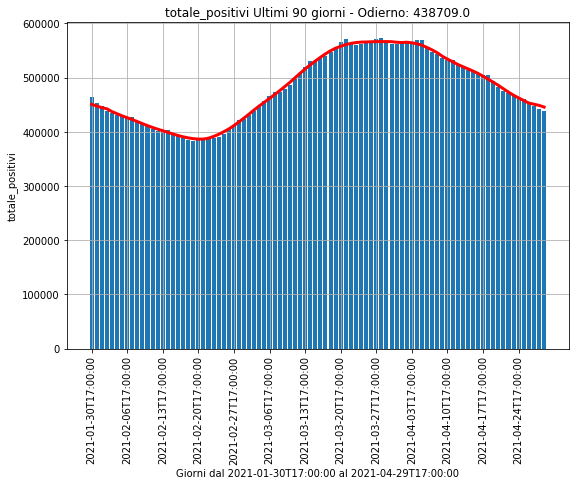

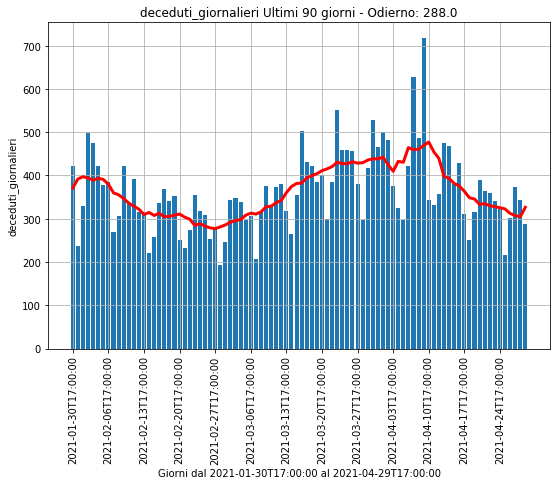

In [38]:
for indicatore in indicatori_selected:
    fig,ax=plt.subplots(1,figsize=figsize_single)
    # stampo il plot smooth con intervallo di confidenza
    '''
    confplot_ax(day_counter[-days_back:],
                   trend[indicatore]['Italia'][-days_back:],
                   window=(3,3),ax=ax,conf_fun='deviation')
    '''
    ax.bar(day_counter[-days_back:],
            trend[indicatore]['Italia'][-days_back:])
    ax.plot(day_counter[-days_back:],
            moving_function_rev1(trend[indicatore]['Italia'][-days_back:],np.mean,3,3),color='r',linewidth=3)
    ax.set_title(indicatore+' Ultimi %d giorni - Odierno: %.1f'%(days_back,trend[indicatore]['Italia'][-1]))
    ax.set_xlabel('Giorni dal %s al %s'%(giorni[-days_back],giorni[-1]))
    ax.set_ylabel(indicatore)
    ax.grid()
    
    ax.set_xticks(list(range(len(giorni)-days_back,len(giorni),7)))
    ax.set_xticklabels(giorni[list(range(len(giorni)-days_back,len(giorni),7))],rotation=90)
    



In [39]:
indicatori_selected=['totale_positivi',
                     'deceduti_giornalieri',
                     'terapia_intensiva']

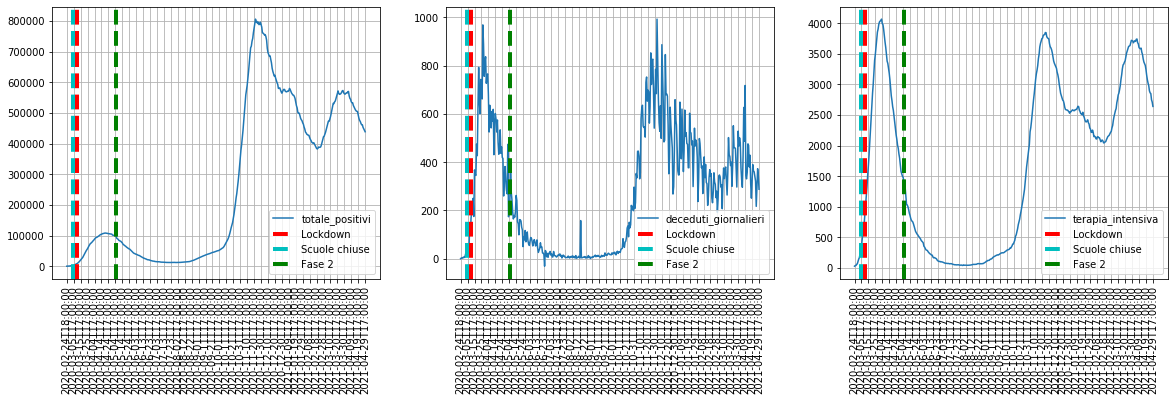

In [40]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
for i,indicatore in enumerate(indicatori_selected):  
    ax[i].plot(day_counter,
             trend[indicatore]['Italia'],label=indicatore)
    ax[i].set_xticks(list(range(0,len(giorni),10)))
    ax[i].set_xticklabels(giorni[list(range(0,len(giorni),10))],rotation=90)
    ax[i].axvline(x=lockdown['id_giorno'],c='r', label='Lockdown',linewidth=4,ls='--')
    ax[i].axvline(x=scuole_chiuse['id_giorno'],c='c', label='Scuole chiuse',linewidth=4,ls='--')
    ax[i].axvline(x=fase_2['id_giorno'],c='g', label='Fase 2',linewidth=4,ls='--')
    ax[i].grid()
    ax[i].legend()

### Grafici per regione

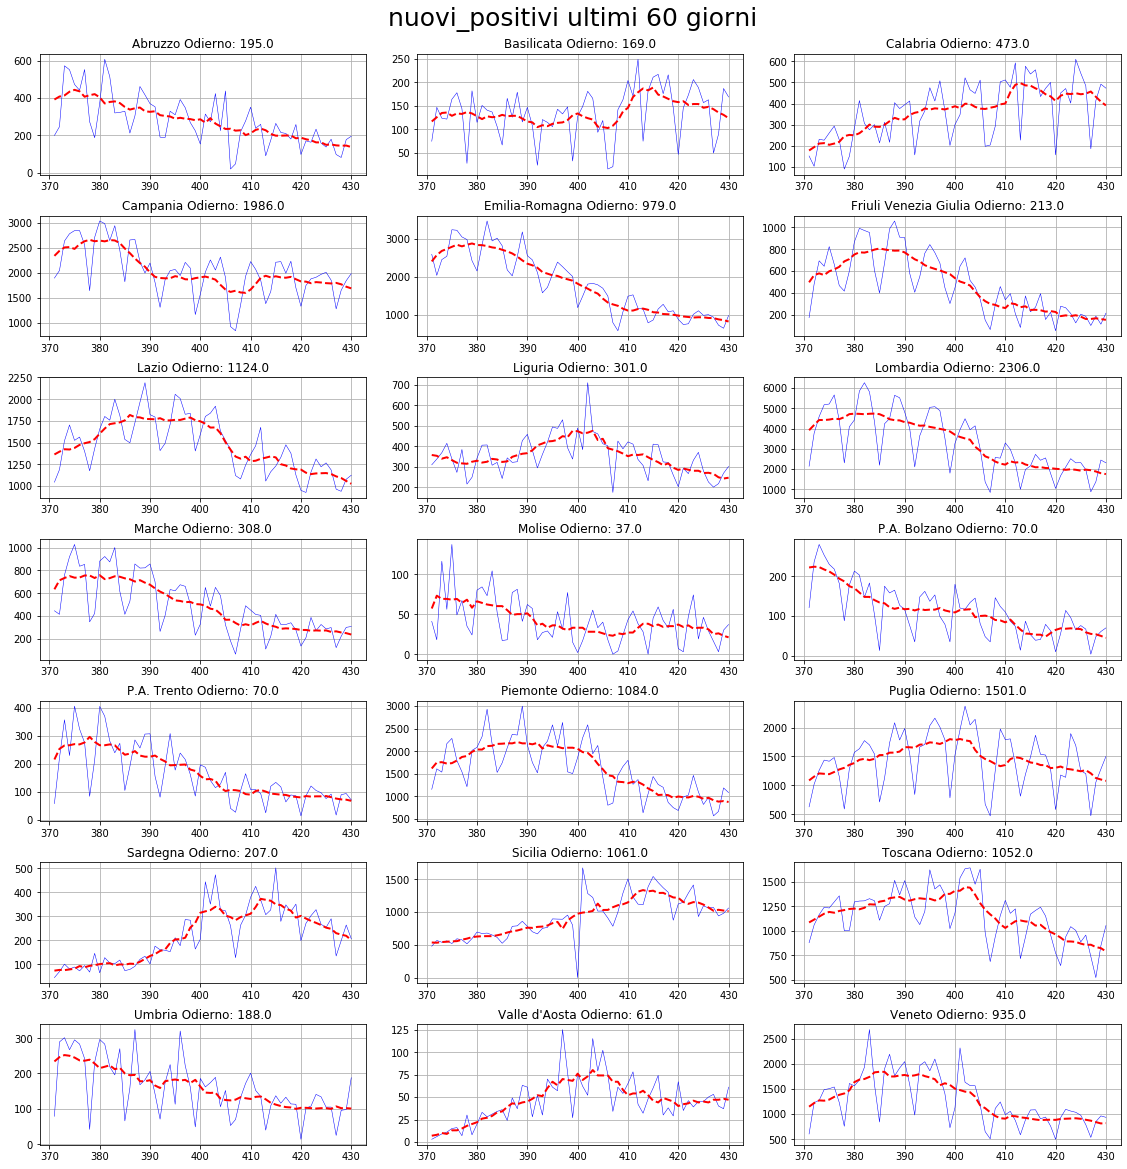

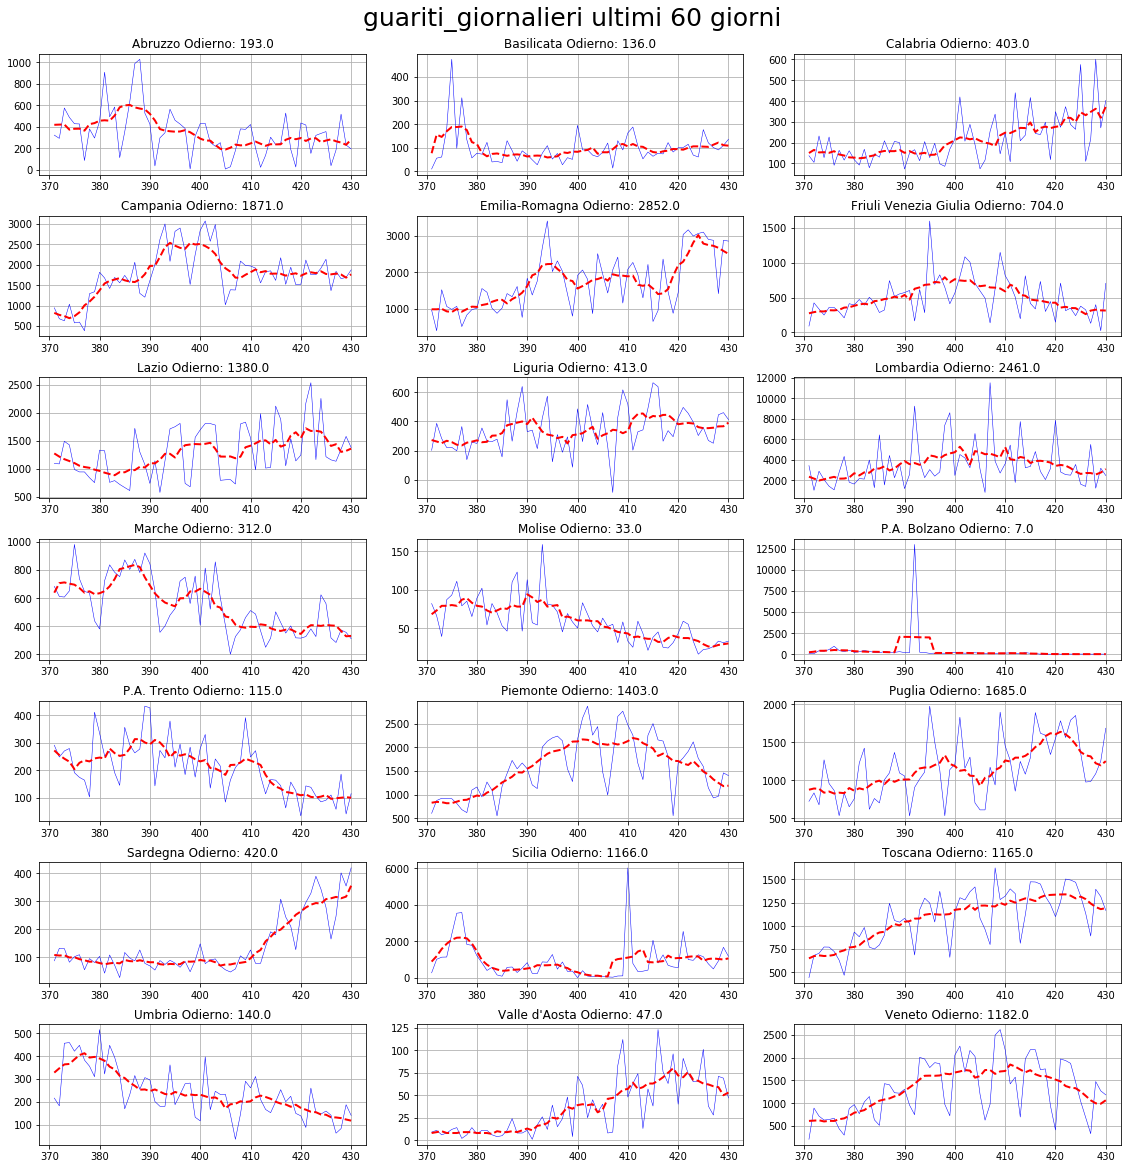

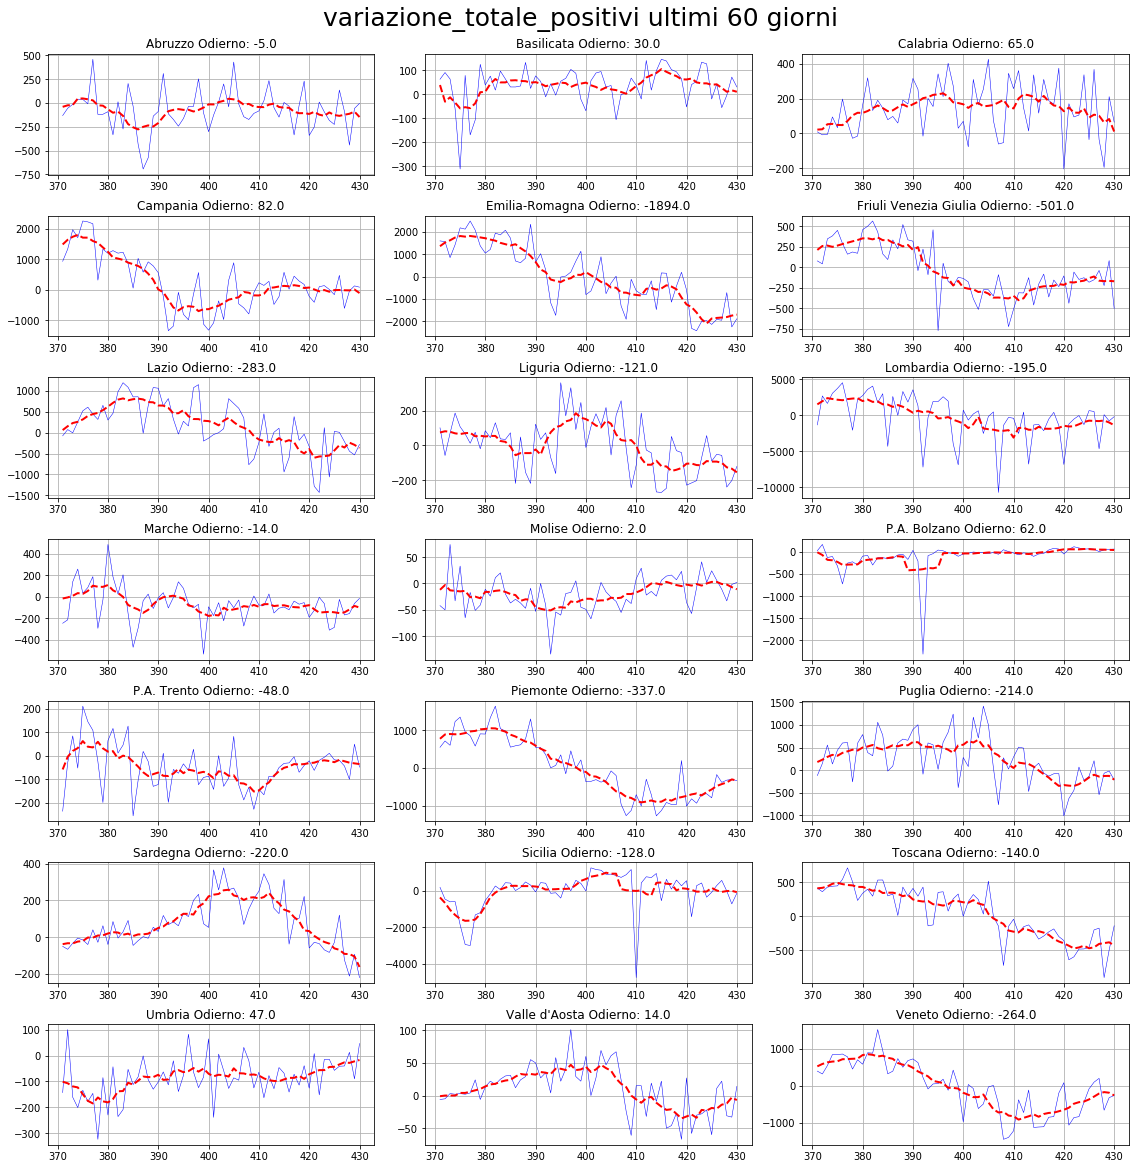

In [41]:
indicatori_selected=['nuovi_positivi',
                    'guariti_giornalieri',
                    'variazione_totale_positivi']

last_days=60

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
    fig.suptitle('%s ultimi %d giorni'%(indicatore,last_days), y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_seq[i]].plot(day_counter[-last_days:],trend[indicatore][regione][-last_days:],
                             'b-',linewidth=0.5,label='Reg')
        ax[grid_seq[i]].plot(day_counter[-last_days:],moving_function_rev1(trend[indicatore][regione][-last_days:],np.mean,3,3),
                             'r--',linewidth=2,label='Trend')
        ax[grid_seq[i]].set_title(regione+' Odierno: %.1f'%trend[indicatore][regione][-1])
        #ax[grid_seq[i]].legend()
        ax[grid_seq[i]].grid()
    fig.savefig('PIC_%s.JPG'%indicatore)

## Deceduti nel tempo
**Italia Giornalieri**

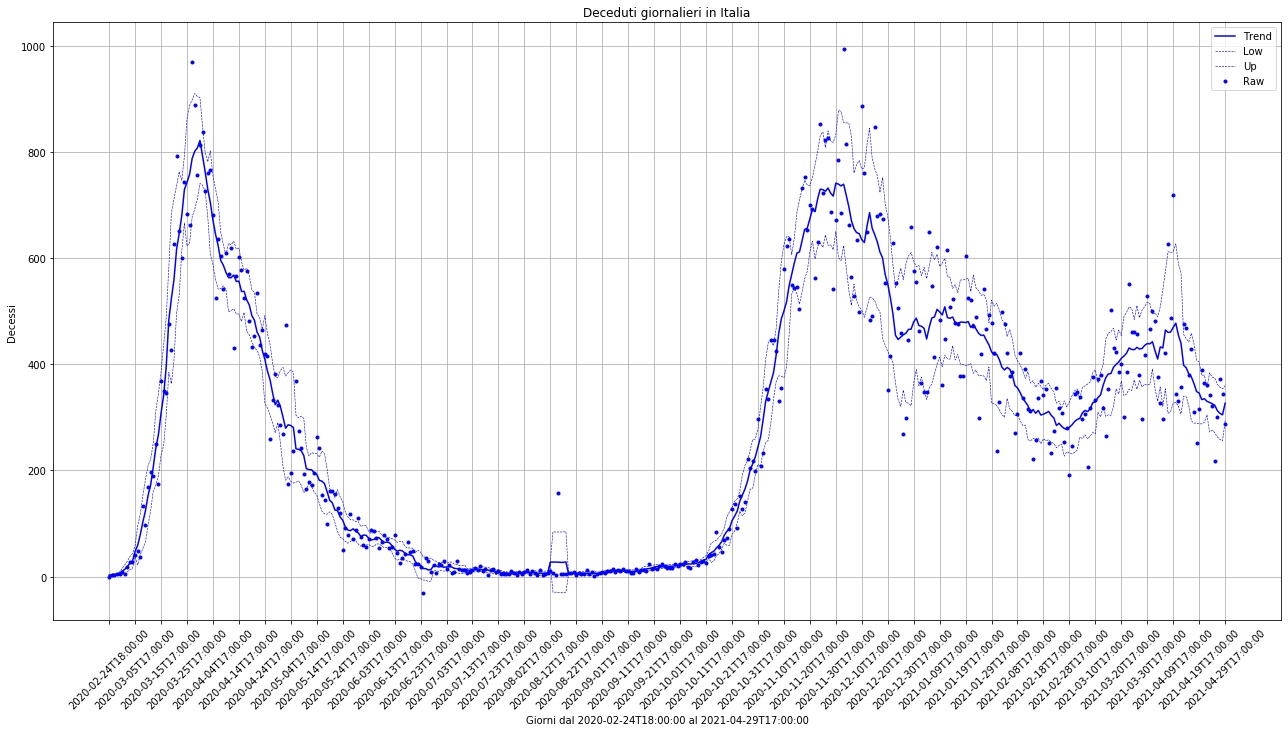

In [42]:
fig,ax=plt.subplots(1,figsize=(22,11))
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            trend['deceduti_giornalieri']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation', )
ax.set_title('Deceduti giornalieri in Italia')
ax.set_xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
ax.set_ylabel('Decessi')
# stampo anche a punti il dato raw
ax.plot(trend['deceduti_giornalieri']['Italia'],'b.')
ax.legend(['Trend','Low','Up','Raw'])
ax.set_xticks(list(range(0,len(giorni),10)))
ax.set_xticklabels(giorni[list(range(0,len(giorni),10))],rotation=45)
ax.grid()

**Per regione giornalieri**

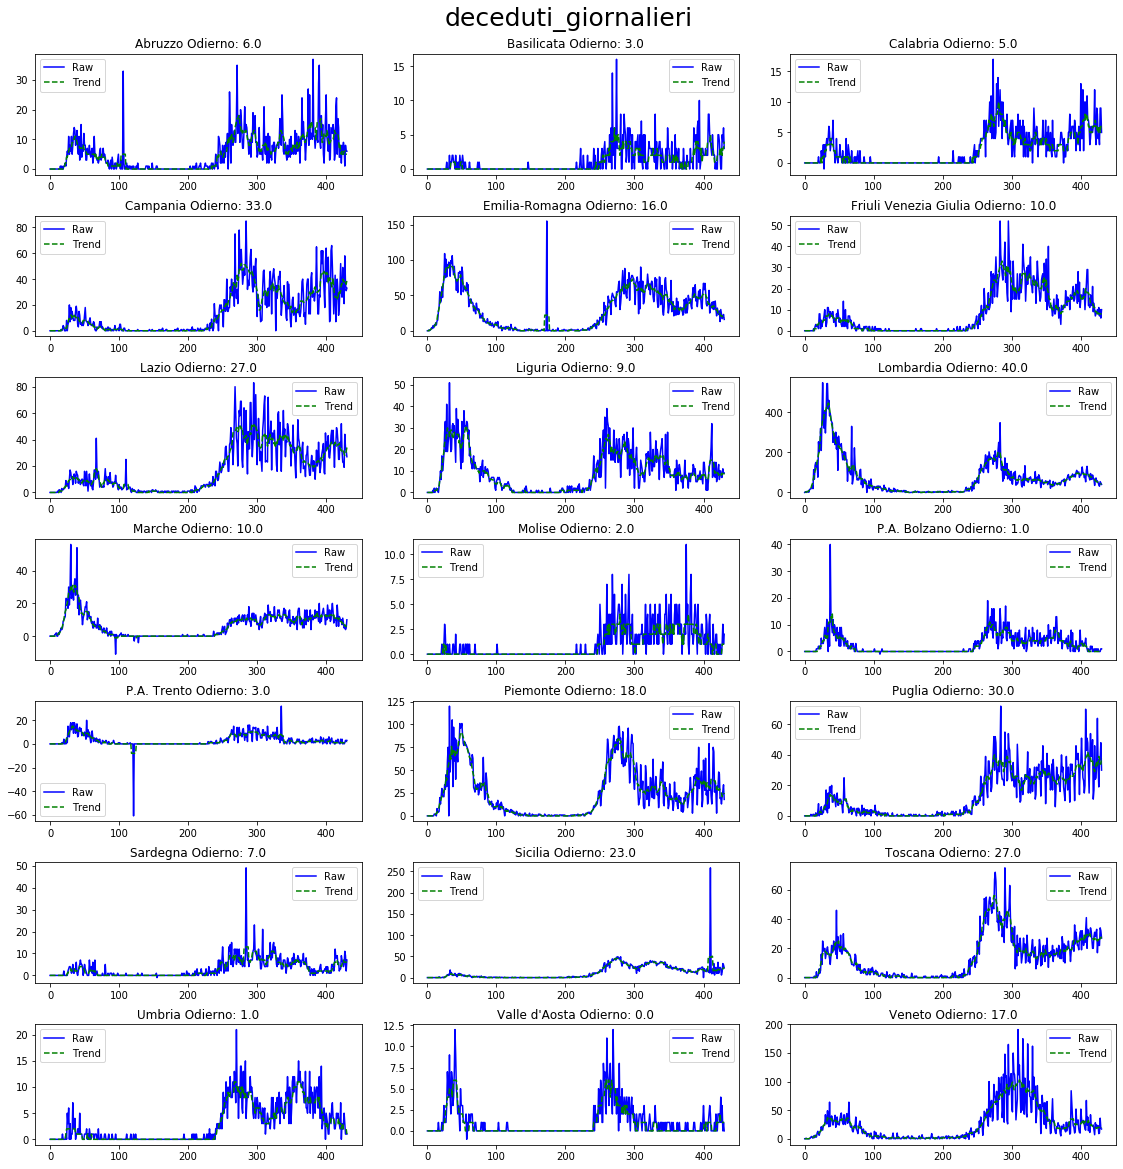

In [43]:
fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
fig.suptitle('deceduti_giornalieri', y=1.02,fontsize=25)
fig.tight_layout(pad=2.0)

for i,regione in enumerate(regioni):
    ax[grid_seq[i]].plot(day_counter,trend['deceduti_giornalieri'][regione],'b-',label='Raw')
    ax[grid_seq[i]].set_title(regione+' Odierno: %.1f'%trend['deceduti_giornalieri'][regione][-1])
    # plotto anche media
    ax[grid_seq[i]].plot(day_counter,
                         moving_function_rev1(trend['deceduti_giornalieri'][regione],np.mean,3,3),
                         'g--',
                         label='Trend')
    ax[grid_seq[i]].legend()

### Indicatori per popolazione e per regione negli ultimi giorni

Si specifica la lista degli indicatori e i giorni indietro cui guardare per la produzione di grafici a barre

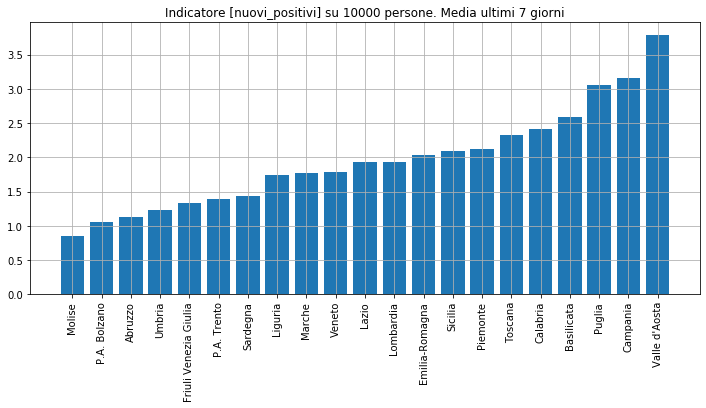

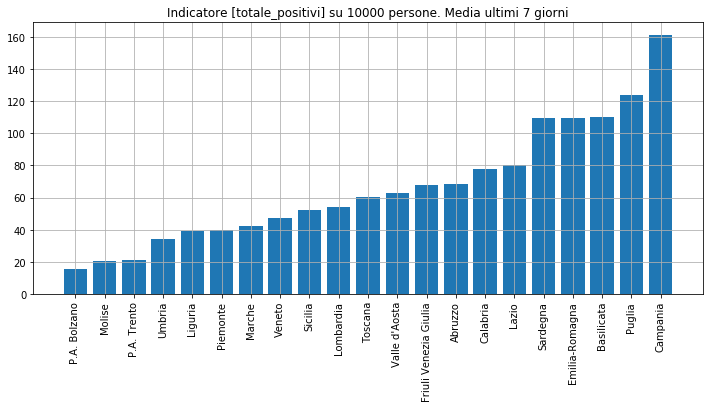

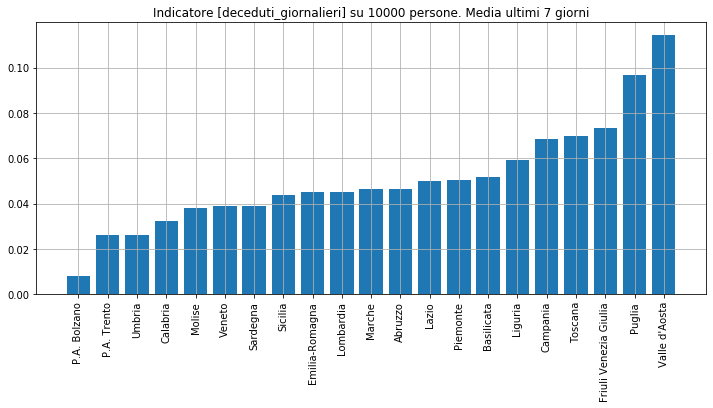

In [44]:
indicatori_selected=['nuovi_positivi','totale_positivi','deceduti_giornalieri']

ultimi_giorni=7
for indicatore in indicatori_selected:
    # calcolo la media da mostrare
    valori=[np.mean(trend[indicatore][r][-ultimi_giorni:])/popolazione[r] for r in regioni]
    valori=np.array(valori)*10000
    ordine=np.argsort(valori)
    plt.figure(figsize=(12,5))
    plt.title('Indicatore [%s] su 10000 persone. Media ultimi %d giorni'%(indicatore,ultimi_giorni))
    plt.bar(range(len(regioni)),valori[ordine])
    plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
    plt.grid()
    plt.show()

### Situazione regione singola

In [45]:
# Selezione regione e indicatori da plottare

regione='Toscana'

indicatori_selected=['nuovi_positivi',
                     'guariti_giornalieri',
                     'deceduti_giornalieri',
                     'totale_positivi','variazione_totale_positivi']

num_indicatori=len(indicatori_selected)

last_days_region=60

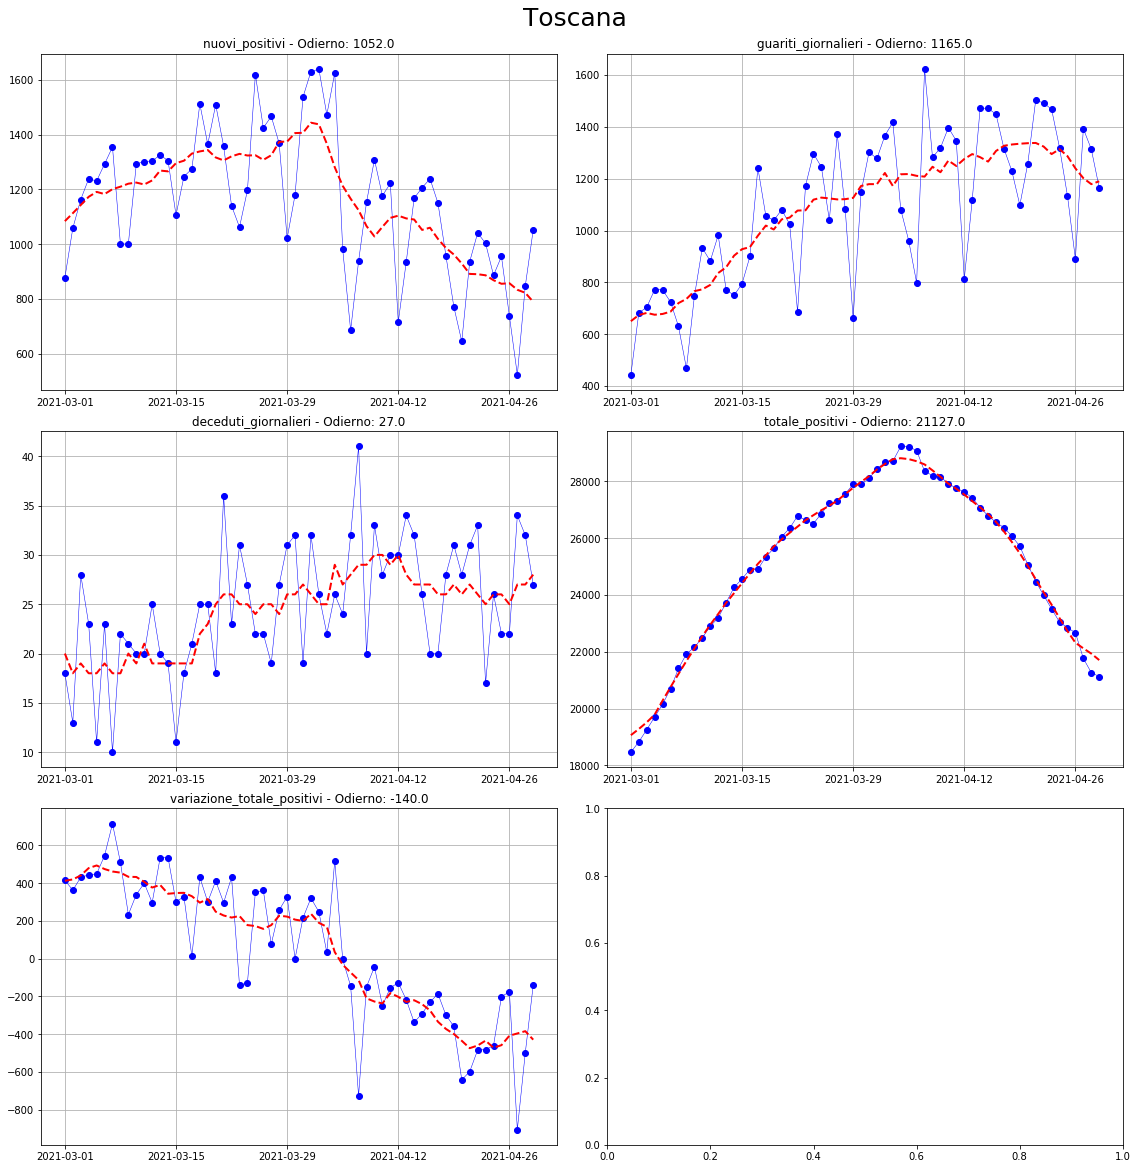

In [46]:
grid_shape=auto_grid_shape(num_indicatori,cols=2)
grid_seq=get_subplot_cells_sequence(grid_shape)

fig,ax=plt.subplots(grid_shape[0],grid_shape[1],figsize=figsize_multi)
fig.suptitle(regione, y=1.02,fontsize=25)
fig.tight_layout(pad=2.0)


for i,indicatore in enumerate(indicatori_selected):
    ax[grid_seq[i]].plot(trend[indicatore][regione][-last_days_region:],'bo-',linewidth=0.5,label='Reg')
    ax[grid_seq[i]].plot(moving_function_rev1(trend[indicatore][regione][-last_days_region:],np.mean,3,3),'r--',linewidth=2,label='Trend')
    ax[grid_seq[i]].set_title(indicatore+' - Odierno: %.1f'%trend[indicatore][regione][-1])
    ax[grid_seq[i]].set_xticks(list(range(0,last_days_region,14)))
    ax[grid_seq[i]].set_xticklabels(giorni_label[list(range(len(giorni)-last_days_region,len(giorni),14))])
    #ax[grid_seq[i]].legend()
    ax[grid_seq[i]].grid()

### Relazione fra deceduti e terapia intensiva

In [47]:
from sklearn.linear_model import LinearRegression

var_indip='terapia_intensiva'

lr=LinearRegression()
lr.fit(trend[var_indip]['Italia'].reshape(-1, 1),
         trend['deceduti_giornalieri']['Italia'])

newx=np.linspace(0,max(trend[var_indip]['Italia'])).reshape(-1,1)

lry=lr.predict(newx)

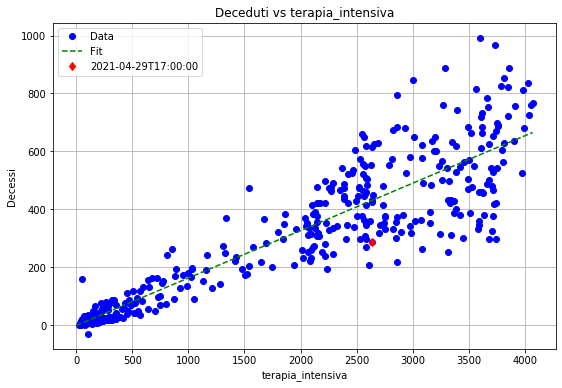

In [48]:
plt.figure(figsize=figsize_single)
plt.plot(trend[var_indip]['Italia'],
         trend['deceduti_giornalieri']['Italia'],
        'bo',label='Data',)

plt.plot(newx,
         lry,
        'g--',label='Fit',)

plt.plot(trend[var_indip]['Italia'][-1],
         trend['deceduti_giornalieri']['Italia'][-1],
        'rd',label=giorni[-1],)


plt.title('Deceduti vs %s'%var_indip)
plt.xlabel(var_indip)
plt.ylabel('Decessi')
plt.legend()
plt.grid()

## Deceduti vs Guariti

Trend della percentuale giornaliera di **deceduti** e **guariti** rispetto al numero di *attualmente* infetti (al giorno precedente)

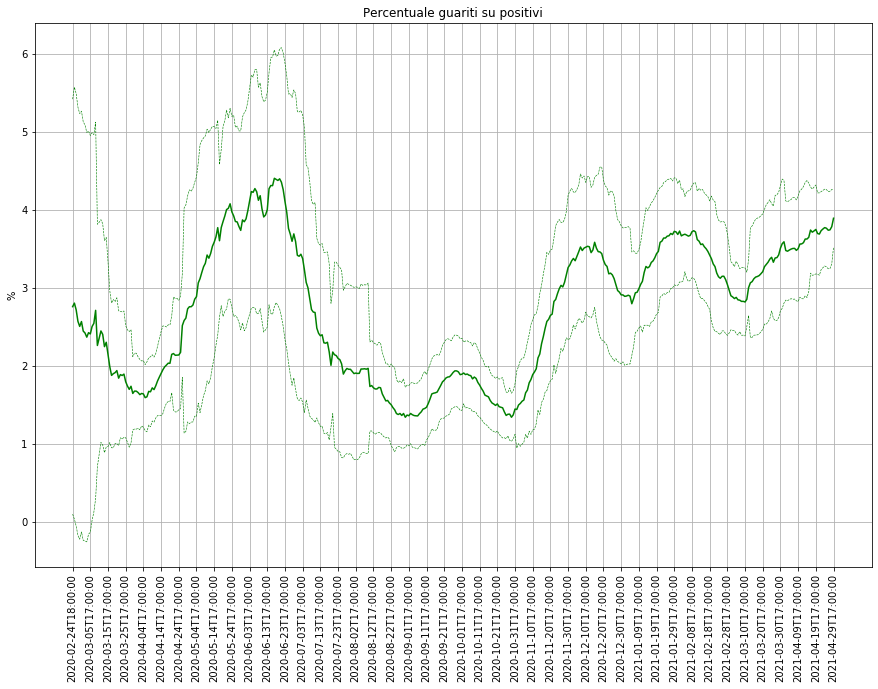

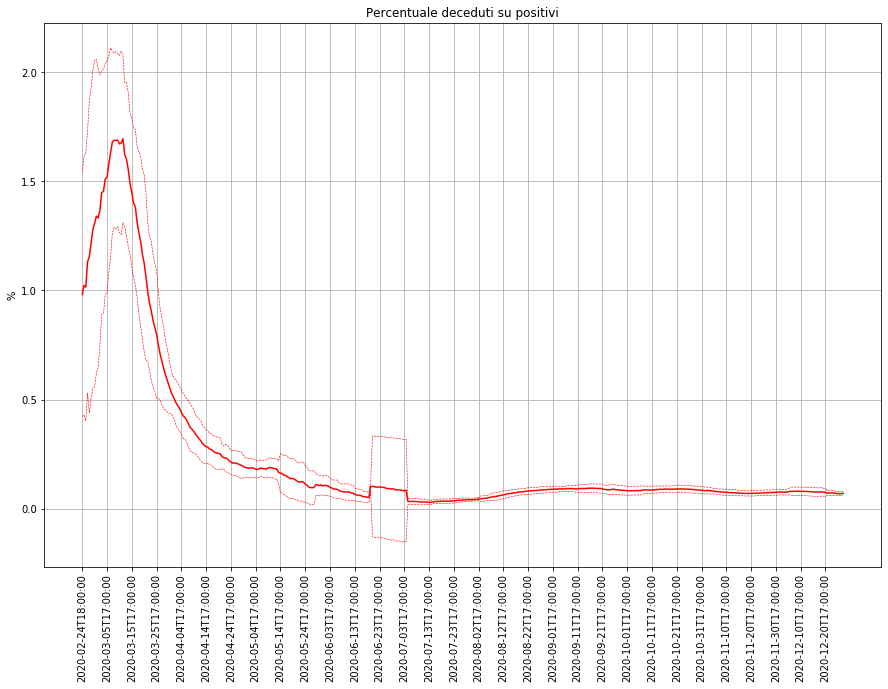

In [49]:
fig,ax=plt.subplots(1,figsize=(15,10))
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            trend['perc_guariti_su_positivi']['Italia'],
            window=(10,10),
            ax=ax,conf_fun='deviation',color='g')
ax.set_title('Percentuale guariti su positivi')
ax.set_xticks(list(range(0,len(giorni),10)))
ax.set_xticklabels(giorni[list(range(0,len(giorni),10))],rotation=90)
ax.set_ylabel('%')
ax.grid()



fig,ax=plt.subplots(1,figsize=(15,10))
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            trend['perc_deceduti_su_positivi']['Italia'],
            window=(10,10),
            ax=ax,conf_fun='deviation',color='r')
ax.set_title('Percentuale deceduti su positivi')
ax.set_xticks(list(range(0,len(giorni),14)))
ax.set_xticklabels(giorni[list(range(0,len(giorni),10))],rotation=90)
ax.set_ylabel('%')
ax.grid()


C:\Users\klaat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


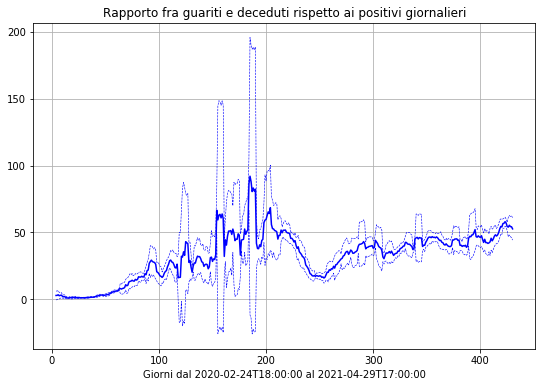

In [50]:
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            trend['perc_guariti_su_positivi']['Italia']/trend['perc_deceduti_su_positivi']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation')
ax.set_title('Rapporto fra guariti e deceduti rispetto ai positivi giornalieri')
ax.set_xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
# stampo anche a punti il dato raw
#ax.plot(trend['perc_guariti_su_positivi']['Italia']/trend['perc_deceduti_su_positivi']['Italia'],'bx')
#ax.legend(['Trend','Low','Up','Raw'])
ax.grid()


## Analisi per giorno della settimana

In [51]:
diz_day={0:'DO',
        1:'LU',
        2:'MA',
        3:'ME',
        4:'GI',
        5:'VE',
        6:'SA'}

In [52]:
indicatore='nuovi_positivi'
operando=np.mean

last_days=42
counter=np.zeros((7))

temp_vals=trend[indicatore]['Italia'][-last_days:]

In [53]:
for d in range(7):
    indici_day=find_matlabstyle(giorno_settimana[-last_days:],lambda x:x==d)
    counter[d]=operando(temp_vals[indici_day])

In [54]:
counter

array([10756.5       , 13078.33333333, 16814.66666667, 18668.66666667,
       20216.        , 19270.5       , 16565.5       ])

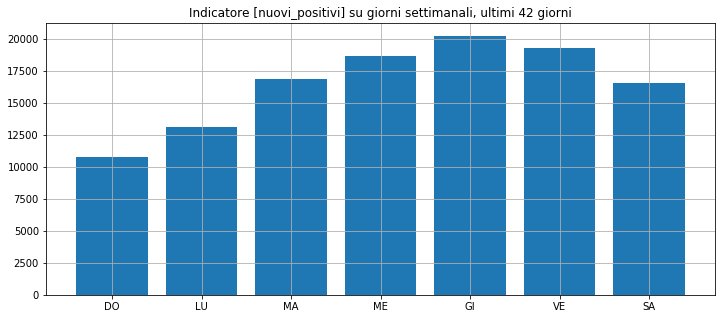

In [55]:
plt.figure(figsize=(12,5))
plt.title('Indicatore [%s] su giorni settimanali, ultimi %d giorni'%(indicatore,last_days))
plt.bar(range(7),counter)
plt.xticks(range(7),list(diz_day.values()))
plt.grid()
plt.show()

## Scatter plots comparativi

In [56]:
x_indicator='nuovi_positivi'
y_indicator='deceduti_giornalieri'

ultimi_giorni=7

moltiplicatore_x=10000
moltiplicatore_y=100000


x_valori=[moltiplicatore_x*np.nanmean(trend[x_indicator][r][-ultimi_giorni:])/popolazione[r] for r in regioni]
y_valori=[moltiplicatore_y*np.nanmean(trend[y_indicator][r][-ultimi_giorni:])/popolazione[r] for r in regioni]

Text(0.5, 1.0, 'Media ultimi 7 giorni')

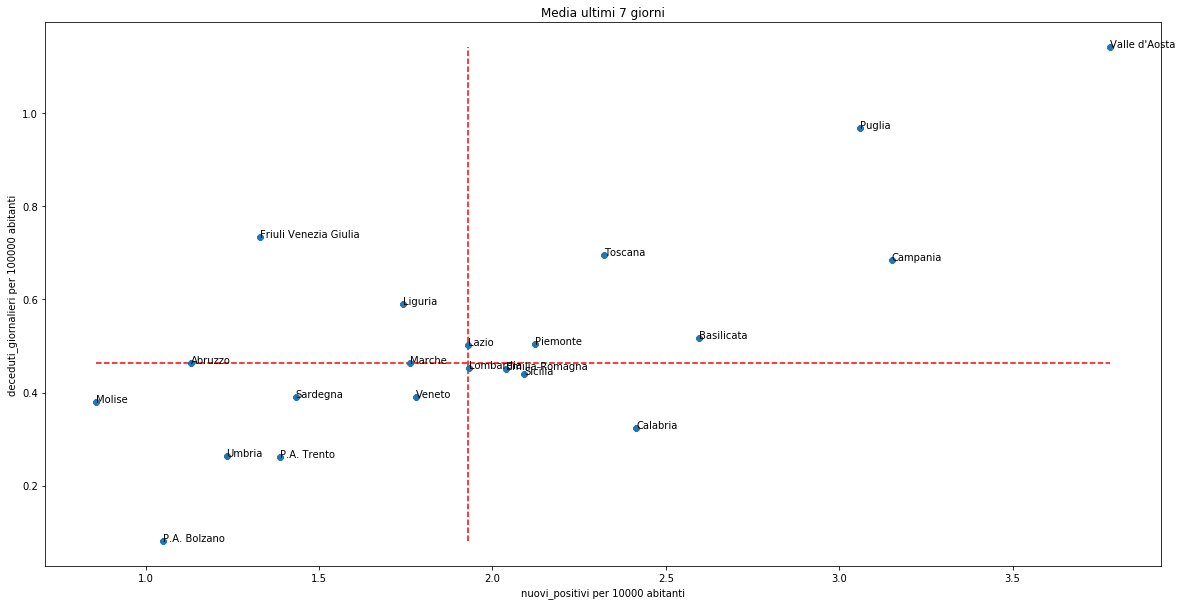

In [57]:
fig,ax=plt.subplots(1,1,figsize=(20,10))

ax.plot(x_valori,y_valori,marker='8',linestyle='')
#ax.set_yscale('log')
#ax.set_xscale('log')

for i in range(len(regioni)):
    ax.text(x_valori[i],
            y_valori[i],
            regioni[i])
        
ax.hlines(np.nanmedian(y_valori),min(x_valori),max(x_valori),colors='r', linestyles='--')
ax.vlines(np.nanmedian(x_valori),min(y_valori),max(y_valori),colors='r', linestyles='--')
ax.set_xlabel('%s per %d abitanti'%(x_indicator,moltiplicatore_x))
ax.set_ylabel('%s per %d abitanti'%(y_indicator,moltiplicatore_y))
ax.set_title('Media ultimi %d giorni'%(ultimi_giorni))

## Incidenza settimanale per zona rossa

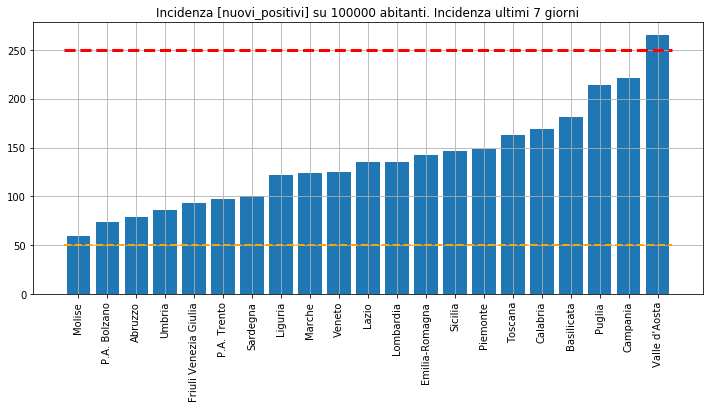

Regione: Molise   Incidenza: 59.9 su 100000
Regione: P.A. Bolzano   Incidenza: 73.4 su 100000
Regione: Abruzzo   Incidenza: 79.1 su 100000
Regione: Umbria   Incidenza: 86.3 su 100000
Regione: Friuli Venezia Giulia   Incidenza: 93.1 su 100000
Regione: P.A. Trento   Incidenza: 97.2 su 100000
Regione: Sardegna   Incidenza: 100.3 su 100000
Regione: Liguria   Incidenza: 122.0 su 100000
Regione: Marche   Incidenza: 123.4 su 100000
Regione: Veneto   Incidenza: 124.6 su 100000
Regione: Lazio   Incidenza: 135.1 su 100000
Regione: Lombardia   Incidenza: 135.4 su 100000
Regione: Emilia-Romagna   Incidenza: 142.7 su 100000
Regione: Sicilia   Incidenza: 146.4 su 100000
Regione: Piemonte   Incidenza: 148.5 su 100000
Regione: Toscana   Incidenza: 162.5 su 100000
Regione: Calabria   Incidenza: 169.1 su 100000
Regione: Basilicata   Incidenza: 181.7 su 100000
Regione: Puglia   Incidenza: 214.1 su 100000
Regione: Campania   Incidenza: 220.6 su 100000
Regione: Valle d'Aosta   Incidenza: 264.7 su 100000


In [58]:
indicatori_selected=['nuovi_positivi']

ultimi_giorni=7
for indicatore in indicatori_selected:
    # calcolo la media da mostrare
    valori=[np.sum(trend[indicatore][r][-ultimi_giorni:])/popolazione[r] for r in regioni]
    valori=np.array(valori)*100000
    ordine=np.argsort(valori)
    plt.figure(figsize=(12,5))
    plt.title('Incidenza [%s] su 100000 abitanti. Incidenza ultimi %d giorni'%(indicatore,ultimi_giorni))
    plt.hlines(250,-0.5,20.5,color='r',linestyle='--',linewidth=3)
    plt.hlines(50,-0.5,20.5,color='orange',linestyle='--',linewidth=2)
    plt.bar(range(len(regioni)),valori[ordine])
    plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
    plt.grid()
    plt.show()
    
for pos in ordine:
    print('Regione: %s   Incidenza: %.1f su 100000'%(regioni[pos],valori[pos]))

In [59]:
trend['nuovi_positivi']['Toscana'][-7:]

array([1003,  886,  955,  737,  522,  847, 1052], dtype=int64)

In [60]:
np.sum(trend['nuovi_positivi']['Toscana'][-7:])/popolazione['Toscana']*100000

162.54327965324822

## Indice dei 250 su 100k nel tempo

In [61]:
popolazione['Italia']=np.sum([popolazione[r] for r in regioni if r!='Italia'])

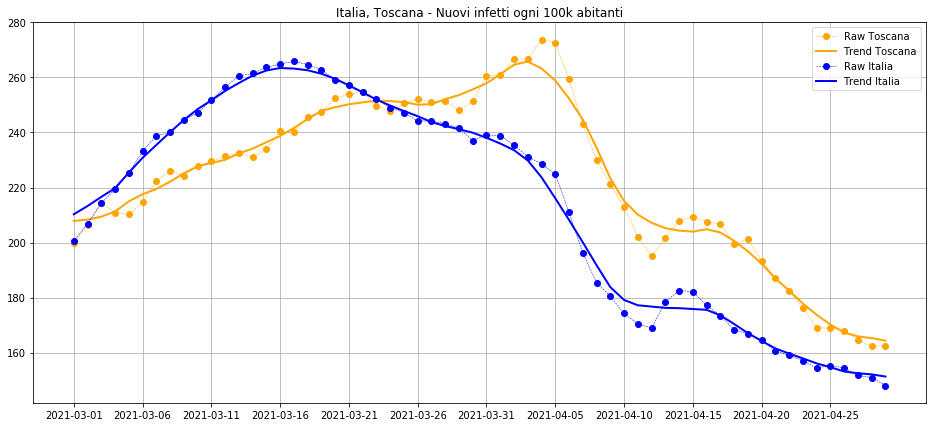

In [62]:
regione='Toscana'
last_days=60
num_samples=len(trend['nuovi_positivi'][regione])

valori_italia=[np.sum(trend['nuovi_positivi']['Italia'][d-7:d])/popolazione['Italia']*100000 for d in range(num_samples-last_days+1,num_samples+1)]
valori_italia=np.array(valori_italia)

valori=[np.sum(trend['nuovi_positivi'][regione][d-7:d])/popolazione[regione]*100000 for d in range(num_samples-last_days+1,num_samples+1)]
valori=np.array(valori)

fig,ax=plt.subplots(1,figsize=(16,7))
# regione
ax.plot(list(range(last_days)),valori,'o--',color='orange',linewidth=0.5,label='Raw %s'%regione)
ax.plot(list(range(last_days)),moving_function_rev1(valori,np.mean,3,3),linewidth=2,color='orange',label='Trend %s'%regione)
# Italia
ax.plot(list(range(last_days)),valori_italia,'bo--',linewidth=0.5,label='Raw Italia')
ax.plot(list(range(last_days)),moving_function_rev1(valori_italia,np.mean,3,3),linewidth=2,color='blue',label='Trend Italia')

ax.legend()
ax.set_title('Italia, %s - Nuovi infetti ogni 100k abitanti'%regione)
ax.set_xticks(list(range(0,last_days,5)))
ax.set_xticklabels(giorni_label[list(range(len(giorni)-last_days,len(giorni),5))])
ax.grid()

In [63]:
valori

array([199.86161344, 206.19868898, 214.48563393, 210.82962881,
       210.20675386, 214.72936761, 222.50176368, 225.83279057,
       224.28914397, 227.80974149, 229.51587722, 231.49282814,
       232.38651828, 231.03244231, 233.90308337, 240.56513715,
       240.0776698 , 245.7918704 , 247.44384308, 252.42684266,
       253.86216319, 254.78293485, 249.77285376, 247.66049524,
       250.55821782, 252.18310899, 251.01860365, 251.28941884,
       248.06671803, 251.26233732, 260.49713545, 260.79503217,
       266.61755884, 266.78004796, 273.76707998, 272.6838192 ,
       259.27846708, 243.0024739 , 230.05750761, 221.09352467,
       213.07739492, 202.13646107, 194.9327769 , 201.67607524,
       207.93190623, 209.36722676, 207.4715204 , 206.74031937,
       199.59079824, 201.10736333, 193.25372269, 186.97081018,
       182.50235948, 176.11112089, 168.96159976, 168.8803552 ,
       167.95958354, 164.65563817, 162.24538294, 162.54327965])

In [64]:
print(num_samples)
for d in range(num_samples-last_days+1,num_samples+1):
    print(trend['nuovi_positivi'][regione][d-7:d])

431
[ 824  857 1374 1254 1126 1068  877]
[ 857 1374 1254 1126 1068  877 1058]
[1374 1254 1126 1068  877 1058 1163]
[1254 1126 1068  877 1058 1163 1239]
[1126 1068  877 1058 1163 1239 1231]
[1068  877 1058 1163 1239 1231 1293]
[ 877 1058 1163 1239 1231 1293 1355]
[1058 1163 1239 1231 1293 1355 1000]
[1163 1239 1231 1293 1355 1000 1001]
[1239 1231 1293 1355 1000 1001 1293]
[1231 1293 1355 1000 1001 1293 1302]
[1293 1355 1000 1001 1293 1302 1304]
[1355 1000 1001 1293 1302 1304 1326]
[1000 1001 1293 1302 1304 1326 1305]
[1001 1293 1302 1304 1326 1305 1106]
[1293 1302 1304 1326 1305 1106 1247]
[1302 1304 1326 1305 1106 1247 1275]
[1304 1326 1305 1106 1247 1275 1513]
[1326 1305 1106 1247 1275 1513 1365]
[1305 1106 1247 1275 1513 1365 1510]
[1106 1247 1275 1513 1365 1510 1358]
[1247 1275 1513 1365 1510 1358 1140]
[1275 1513 1365 1510 1358 1140 1062]
[1513 1365 1510 1358 1140 1062 1197]
[1365 1510 1358 1140 1062 1197 1620]
[1510 1358 1140 1062 1197 1620 1425]
[1358 1140 1062 1197 1620 1425 146